In [1]:
import gen_randomnet as rdnet
import networkx as nx

In [3]:
z = 1
ER = nx.erdos_renyi_graph(5, 5/5)
rdnet.nodeSetting(ER,z)
mapping = {}
for node in ER.nodes():
    mapping[node] = str(z) + '-' + str(node)
H = nx.relabel_nodes(ER, mapping)
a = list(H.nodes())[0]
b=a.split('-')[0]


In [7]:
def foreign_neighbors(node, G):
    """

    Find the set of all neighbor nodes that initially came from a different network

    Parameters
        - Graph G : any networkx graph
        - node node : a node from the graph

    Return
        - set : set of foreign neighbors

    """

    foreign = []
    numb = G.nodes[node]['num']
    s = set(G.neighbors(node))
    while s:
        x = s.pop()
        if G.nodes[x]['num'] != numb:
            foreign.append(x)
    if len(foreign) == 0:
        foreign = [None]

    return set(foreign)

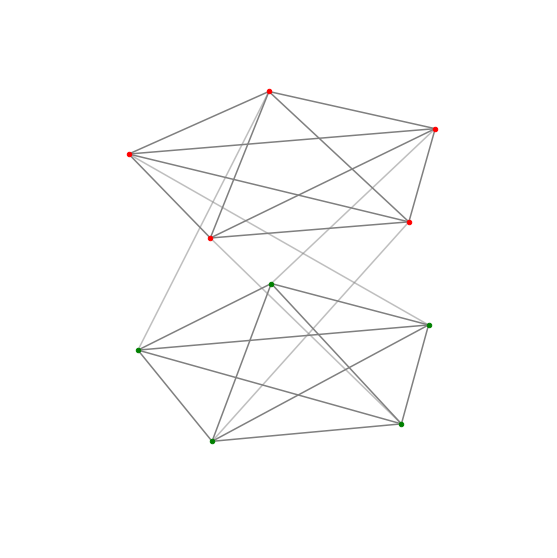

In [8]:
ER_a = rdnet.networkER_w_3Dpos(5,5,1)
ER_b = rdnet.networkER_w_3Dpos(5,5,2)

intd_ER = rdnet.intd_random_net(ER_a,ER_b)
a = intd_ER.nodes()
rdnet.intdNetworkDraw(intd_ER)
# numb = intd_ER.nodes['a-1']['num']

In [9]:
e = ER_b.edges()
n = ER_b.nodes()

In [10]:
verbose = True
removed = 0

# get the edges in g2
edges = set(ER_b.edges())

# get list of connected components for g1
components = list(nx.connected_components(ER_a))

# For each edge pair (a,b) find the foreign neighbors of node a and b.
# If these neighbors are in different clusters delete the edge (a,b).
while edges:
    a, b = edges.pop()
    print(a, b)
    n1 = foreign_neighbors(a, intd_ER)
    n2 = foreign_neighbors(b, intd_ER)
    if n1 == {None} or n2 == {None}:
        continue
    for comp in components:
        if (n1.issubset(comp) and not n2.issubset(comp)) or (not n1.issubset(comp) and n2.issubset(comp)):
            intd_ER.remove_edge(a, b)
            ER_b.remove_edge(a, b)

            removed = 1
            if verbose:
                print('Removed', tuple((a, b)))
            break

2-0 2-2
2-0 2-1
2-1 2-3
2-0 2-3
2-1 2-4
2-2 2-3
2-1 2-2
2-2 2-4
2-3 2-4
2-0 2-4


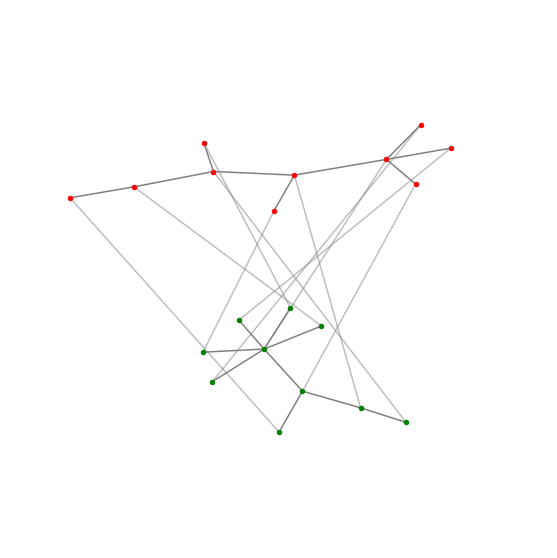

In [6]:
BA_a = rdnet.networkSF_w_3Dpos_BA(10,1,1)
BA_b = rdnet.networkSF_w_3Dpos_BA(10,1,2)

intd_BA = rdnet.intd_random_net(BA_a,BA_b)

rdnet.intdNetworkDraw(intd_BA)

Generate Scale-Free Network based on given powerLaw parameters. Last gamma: 2.9531870461489564
Generate Scale-Free Network based on given powerLaw parameters. Last gamma: 2.9685634276540664


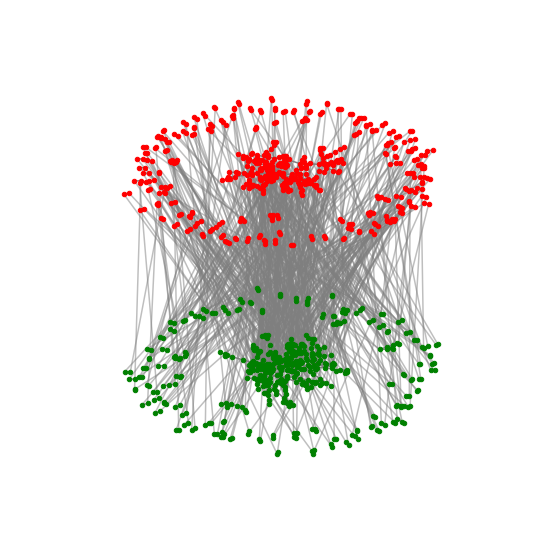

In [5]:
PowerL_a = rdnet.networkSF_w_3Dpos_PowerL(500,3,1)
PowerL_b = rdnet.networkSF_w_3Dpos_PowerL(500,3,2)

intd_PowerL = rdnet.intd_random_net(PowerL_a,PowerL_b)

rdnet.intdNetworkDraw(intd_PowerL)